In [1]:
import datetime

from numpy import array
import pandas
import matplotlib.pyplot as plt

import data_pers
import useful
import read_contacts
from read_data import DATA_DATES, POP_SIZE, MODEL_n, MODEL_T
from read_data import CONF, WARD, ICUC, DEAD
from model import Epidemic
from MCMC import TRIAL_N

In [2]:
def load_models(H, n, prognosis=0):
    """
    Load models from the table with parameter values
    
    H: padas.DataFramw with parameter samples
    n: number of models to load. 
    prognosis: number of extra days to model.
    """
    subsample = H[::max(1, len(H)//n)]
    simulations = [Epidemic(T=MODEL_T + prognosis) for i in range(len(subsample))]
    [sim.load(row) for sim, (_, row) in zip(simulations, subsample.iterrows())]
    return simulations


def add_transformed(H):
    """
    Adds aditional columns to the pandas dataframe, 
    representing basic transformation of model parameters
    """
    N = [sim.transformed_pars() for sim in load_models(H, len(H))]
    return pandas.concat([H, pandas.DataFrame(N)], axis=1)    

In [3]:
TRIAL_N

'C:/MCMC_output/covid_model'

# Warm-up Iterations

In [4]:
# Load warm-up iterations
H = data_pers.Load(TRIAL_N, files=[0])
print( len(H) )
print( H['Posterior'].min(), H['Posterior'].max() )

500
-793082.8847093751 -94906.06735247392


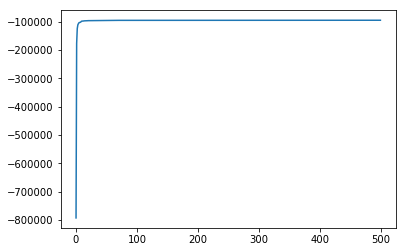

In [5]:
# show traceplots
plt.plot(H['Posterior'])
plt.show()

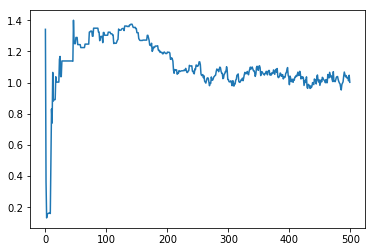

In [6]:
# show traceplots
plt.plot(H['current_Re'])
plt.show()

# Parameter estimates

In [7]:
# Load main iterations
H = data_pers.Load(TRIAL_N, files=[1])

print( len(H) )
print( H['Posterior'].min(), H['Posterior'].max() )

20000
-94933.56634090262 -94900.39088157854


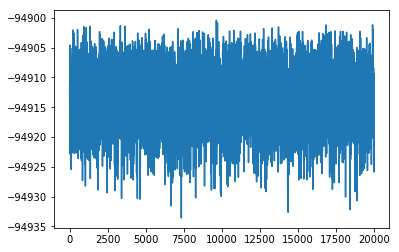

In [8]:
# show traceplots
plt.plot(H['Posterior'])
plt.show()

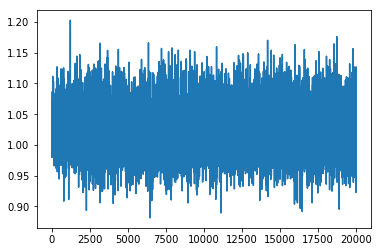

In [9]:
# show traceplots
plt.plot(H['current_Re'])
plt.show()

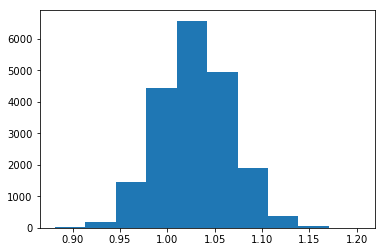

In [10]:
# show histogram
plt.hist(H['current_Re'])
plt.show()

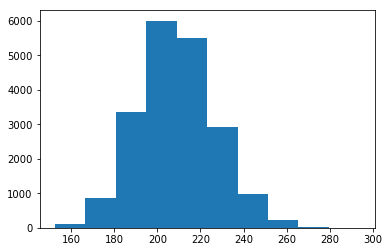

In [11]:
# add basic transformations
N = add_transformed(H) 
# show a histogram of a derivetive from the basic parameters
plt.hist(N['start'])
plt.show()

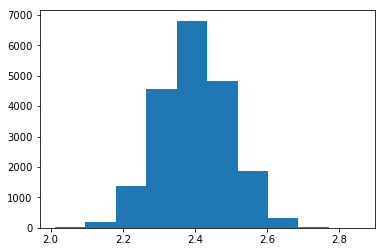

In [12]:
# show a histogram of a last effective R
plt.hist(N['Ro_w'].str[-1])
plt.show()

# Incidence

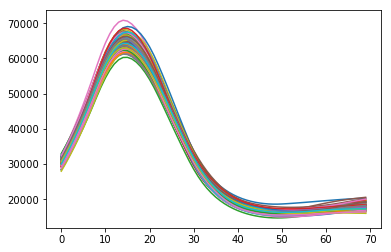

In [13]:
# show samples from the posterior
# run 100 models, using 100 samples from posterior
S = load_models(H, n=100) 

for ep in S:
    # total number of infected
    plt.plot(ep.I.sum(0))
plt.show()

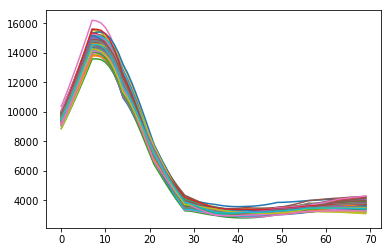

In [14]:
# new infections per day
for ep in S:
    plt.plot(ep.new_E.sum((0, 1)))
plt.show()

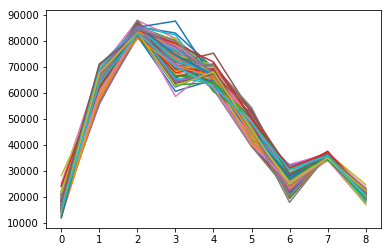

In [15]:
# incidence by age group
for ep in S:
    plt.plot(ep.new_E.sum((0, 2)))
plt.show()

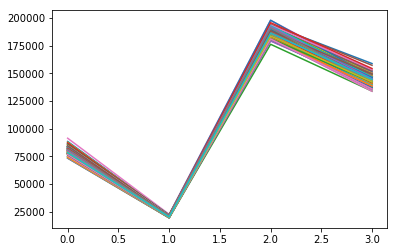

In [16]:
# incidence by vaccine group
for ep in S:
    plt.plot(ep.new_E.sum((1, 2)))
plt.show()

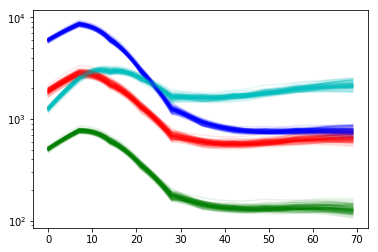

In [17]:
# new infections per day and vaccine group
for ep in S:
    for v in range(4):
        plt.plot(ep.new_E[v, :, :].sum(0), color='rgbc'[v], alpha=0.1)
plt.yscale('log')       
plt.show()

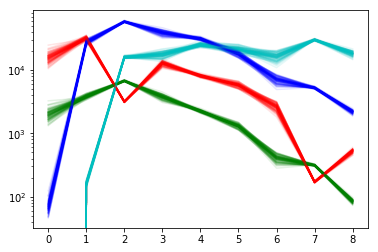

In [18]:
# new infections per age group and vaccine group
for ep in S:
    for v in range(4):
        plt.plot(ep.new_E[v, :, :].sum(1), color='rgbc'[v], alpha=0.1)
plt.yscale('log')
plt.show()

# Other figures


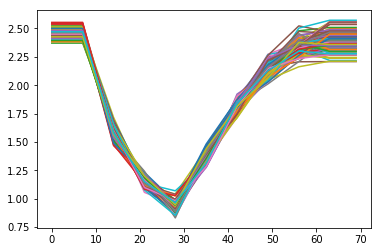

In [19]:
# Ro
for ep in S:
    plt.plot(ep.Ro_t)
plt.show()

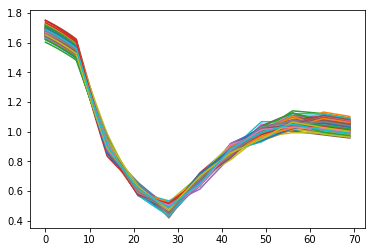

In [20]:
# effective R
for ep in S:
    plt.plot(ep.R_effective)
plt.show()

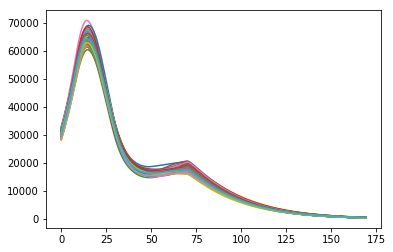

In [21]:
# show samples from prognosis
# run 100 models, using 100 samples from posterior
P = load_models(H, n=100, prognosis=100) 

for ep in P:
    # total number of infectious
    plt.plot(ep.I.sum(0))
plt.show()

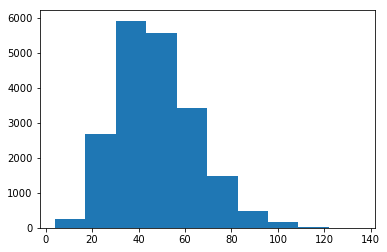

In [22]:
# show histogram of the forecast of the number of hospitalizations next week
plt.hist(H['p_hosp_7'])
plt.show()